In [131]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import multiprocessing

donnees_vin_rouge = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

__<ins>Introduction</ins>__\
Dans le cadre d'un projet de classe nommé "No wine without water" ils nous avons eu à traité une problématique en rapport avec la gestion de l'eau lors de la fabrication du vin.

Plus précisément, notre problématique est "Quelle est la meilleure façon de lutter contre le manque d'eau potable nécessaire à la fabrication du vin rouge ?"

__<ins>Les difficultés liées aux données.</ins>__\
Afin de répondre à cette problématique nous aurions aimer crée un système qui permetrait d'indiquer aux  vignerons et viticulteurs la quantité d'eau optimal qu'ils doivent utiliser afin d'optimiser la croissance de leur vigne.

Nous avons malheureusement était confronter à une absence de données en libre accés concernent la quantité d'eau consommé et la quantité/qualité du vin produit.

Il a donc était décidé de revoir nos objectifs par rapport aux données à notre disposition :
- Nous voulions crée un système ce bassent sur la quantité de vin produit mais les seules données à disposition ce basent sur la qualité du vin ;
- Nous voulions des données qui mête en rapport l'eau et le vin mais l'absence de donnée nous a obliger de nous basser sur une autre metric qui elle-même dépends de l'eau, la quantité de sucre présente dans le vin en terme de grammes par décimettre cube.

Il a donc était décidé de crée un système qui permetrait d'indiquer aux vignerons et viticulteurs la quantité de sucre souhaitables dans leur vin par rapport à diverse metrics afin d'avoir un vin de la qualité souhaité.

__<ins>Présentation des données utilisée.</ins>__\
Les données, et leurs échelles, utiliser pour la résolution de la problématique sont :\
   1 - acidité fixe (acide tartrique - g / dm^3)\
   2 - acidité volatile (acide acétique - g / dm^3)\
   3 - l'acide citrique (g / dm^3)\
   4 - sucre résiduel (g / dm^3)\
   5 - chlorures (chlorure de sodium - g / dm^3)\
   6 - dioxyde de soufre libre (mg / dm^3)\
   7 - dioxyde de soufre total (mg / dm^3)\
   8 - densité (g / cm^3)\
   9 - pH\
   10 - sulfates (sulfate de potassium - g / dm3)\
   11 - alcool (% en volume)\
   12 - qualité (note entre 0 et 10)\
   
Voici un échantillon des donnés utilisé :

In [132]:
print(donnees_vin_rouge)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

__<ins>Le chois de la quantité de sucre comme référence.</ins>__\
En l'absence do donnée en rapport avec l'eau, nous devions nous bassé sur une autre métric ayent un rapport avec.

Après nos recherche documentaire, nous avons conclut que la quantité de sucre dans le vin pourait être un indicateur de la quantité d'eau utilisé lors de la culture des vignes

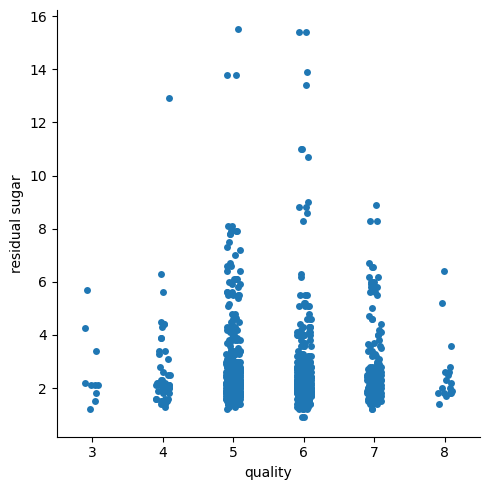

In [133]:
sns.catplot(data=donnees_vin_rouge, x=donnees_vin_rouge['quality'], y=donnees_vin_rouge['residual sugar'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

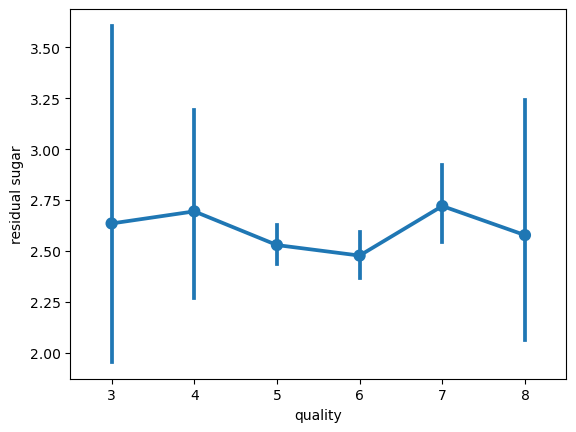

In [134]:
sns.pointplot(data=donnees_vin_rouge, x=donnees_vin_rouge['quality'], y=donnees_vin_rouge['residual sugar'])

In [135]:
# Définition de la donnée à prédire
y = donnees_vin_rouge["residual sugar"]

# Définition des données à partir des quels faire les prédictions
entres = ["fixed acidity", "volatile acidity", "citric acid", 
          "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
          "density", "pH", "sulphates", "alcohol", "quality"]
X = donnees_vin_rouge[entres]

# Division de l'enselmbe des données en deux groupes, 
# l'un des deux sert à l'entrainement du model et l'autre pour validation sont éfficacité.
entrainement_X, validation_X, entrainement_y, validation_y = train_test_split(X, y, random_state = 0)

With a random forest :

In [136]:
model_prediction_sucre = RandomForestRegressor(random_state=0)

# entrainement du model
model_prediction_sucre.fit(entrainement_X, entrainement_y)

# propagation des données de validation pour recevoir les prédictions du réseau
prediction_validation = model_prediction_sucre.predict(validation_X)

# vérification de l'éficacité du model en comparent ce qu'il prédit (prediction_validation) 
# à ce qu'il aurait dû prédire (validation_y)
model_validation_sucre = mean_absolute_error(prediction_validation, validation_y)

print("MAE: {}".format(model_validation_sucre))

MAE: 0.4400012500000001


With a neural network :

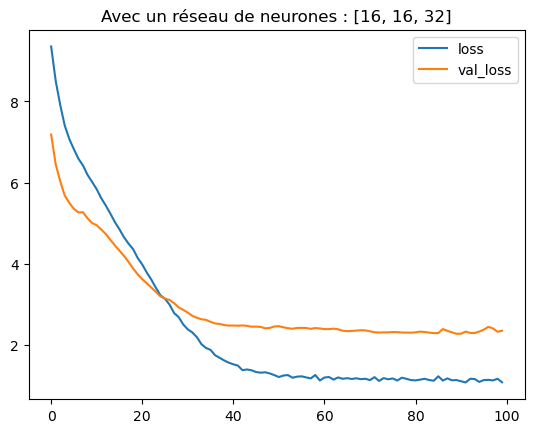

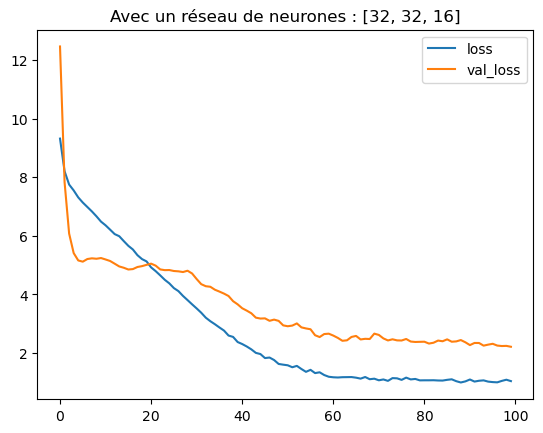

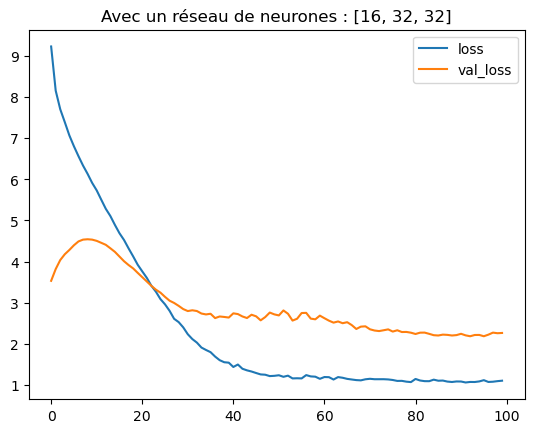

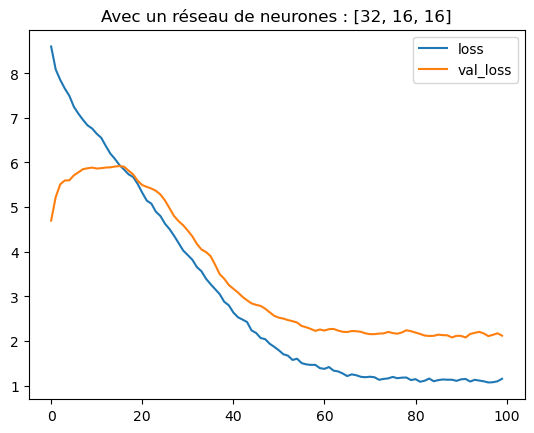

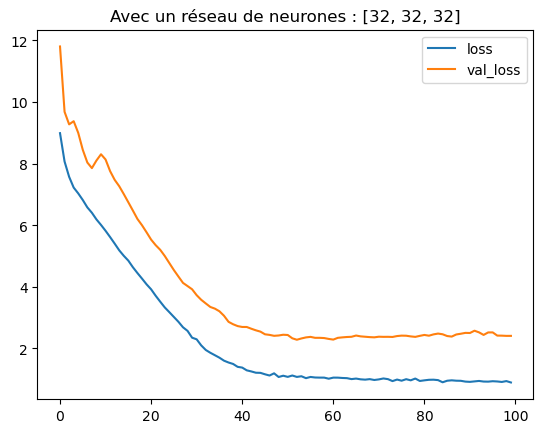

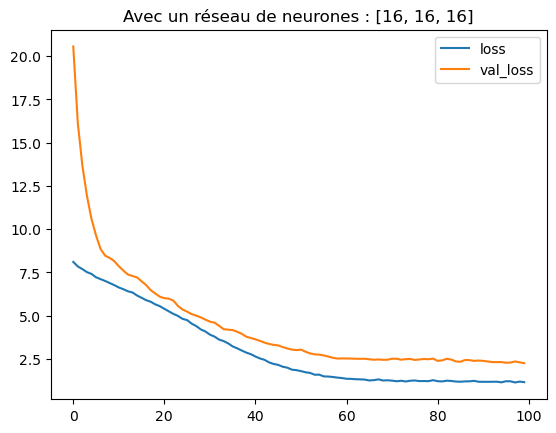

In [ ]:
donnees_vin_rouge = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# Définition des donnés servent à entrainer le model.
donnees_entrainement = donnees_vin_rouge.sample(frac=0.7, random_state=0)
entrainement_X = donnees_entrainement.drop('residual sugar', axis=1)
entrainement_y = donnees_entrainement['residual sugar']

# Définition des données servent à valider la qualité du model.
donnees_validation = donnees_vin_rouge.drop(donnees_entrainement.index)
validation_X = donnees_validation.drop('residual sugar', axis=1)
validation_y = donnees_validation['residual sugar']

############ Fonction d'entrainement pour tester plusieurs modèles ##############################
def test_entrainement_reseau(nb_couches_cachee):
    model_prediction_sucre = Sequential()
    
    model_prediction_sucre.add(Dense(nb_couches_cachee[0], activation='relu', input_shape=(11,)))
    
    for i in range(len(nb_couches_cachee) - 1) :
        model_prediction_sucre.add(BatchNormalization())
        model_prediction_sucre.add(Dense(nb_couches_cachee[i + 1], activation='relu'))
        
    model_prediction_sucre.add(BatchNormalization())
    model_prediction_sucre.add(Dense(1))

    model_prediction_sucre.compile(optimizer='adam', loss='mean_squared_error')

    entrainement = model_prediction_sucre.fit(
        entrainement_X, entrainement_y,
        validation_data=(validation_X, validation_y),
        batch_size=256,
        epochs=100,
        verbose=0,
    )

    resultats = pd.DataFrame(entrainement.history)
    resultats = resultats.loc[:, ['loss', 'val_loss']].plot()
    resultats.set_title(f'Avec un réseau de neurones : {nb_couches_cachee}')
    plt.show()

#################################################################

liste_resaux = [    
    [16, 16, 32], [32, 32, 16],
    [16, 32, 32], [32, 16, 16],
    [32, 32, 32], [16, 16, 16],
    
    [32, 16, 32], [16, 32, 16],
]

for i in liste_resaux :
    test_entrainement_reseau(i)

__<ins>Documentations</ins>__\
Présentation des données :\
https://rpubs.com/Daria/57835test

Relation entre l'eau et le sucre :\
https://paca.chambres-agriculture.fr/fileadmin/user_upload/Provence-Alpes-Cote_d_Azur/020_Inst_Paca/CA83/Documents/Agriculteurs/prestations_vignerons/plaquette_irrigation_viticulture_chambre_agricuture_var.pdf

https://ives-technicalreviews.eu/article/view/4029

https://oeno-one.eu/article/view/798#

Nutrition des plantes avec les sèves élaborées et brutes :\
https://fr.wikipedia.org/wiki/S%C3%A8ve_%C3%A9labor%C3%A9e

https://fr.wikipedia.org/wiki/S%C3%A8ve_brute

https://fr.wikipedia.org/wiki/Photosynth%C3%A8se